### Introduction

The algorithm, given a directed graph and a starting vertex, it will find the shortest paths between the starting vertex and all vertices it can reach. The algorithm **only** works when the paths have non negative edges connecting the vertices.


Thus, given a graph G = (V, E), a starting vertex s $\in$ V and non negative edges of length $l_e$ where e $\in$ E, the output of the algorithm is dist(s, v) for every vertex v $\in$ V

The dist(s, v) denotes the shortest distance from s to v and dist(s, v) = $\infty$ if there is no path from s to a vertex v.

---

We have seen how BFS can be used to find the shortest path to any vertex from a vertex. This is a special case of graph where each edge has unit length. Djikstra's algorithm is more generic in a way where each edge can have a weight of non positive value.

But can we reduce this graph to a graph where edges are of unit length? That is, if an edge between two vertices have a weight 5, we can replace this edge (with the two vertices) with 5 vertices connected one after other with each edge length of 1 as seen in the following graph



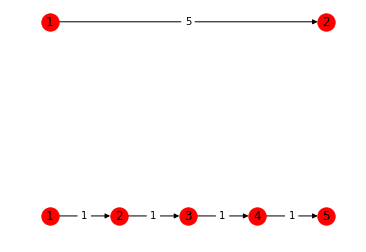

In [46]:
%matplotlib inline
import networkx as nx

g1 = nx.DiGraph()
g1.add_node(1, pos = (0, 5))
g1.add_node(2, pos = (20, 5))
g1.add_edge(1, 2, weight = 5)
pos = nx.get_node_attributes(g1, 'pos')
weights =nx.get_edge_attributes(g1, 'weight')
nx.draw_networkx_edge_labels(g1, pos, edge_labels = weights)
nx.draw(g1, pos, with_labels = True)

g2 = nx.DiGraph()
g2.add_node(1, pos = (0, 0))
g2.add_node(2, pos = (5, 0))
g2.add_node(3, pos = (10, 0))
g2.add_node(4, pos = (15, 0))
g2.add_node(5, pos = (20, 0))
g2.add_edge(1, 2, weight = 1)
g2.add_edge(2, 3, weight = 1)
g2.add_edge(3, 4, weight = 1)
g2.add_edge(4, 5, weight = 1)
pos = nx.get_node_attributes(g2, 'pos')
weights =nx.get_edge_attributes(g2, 'weight')
nx.draw_networkx_edge_labels(g2, pos, edge_labels = weights)
nx.draw(g2, pos, with_labels = True)



The idea sounds right and also works well for small graphs with small length edges. But imagine graphs with vertices of length order or magnitude larger than the number of vertices in a graph (e.g. two vertices connected by edge of length 100 gets transformed to a graoh with 100 vertices each of unit length). 

Though BFS runs in linear time of the input graph size, the transformed graph is way larger that the original graph and hence the time complexity is no longer linear with respect to the original input graph and thus this appoach, though clever doesn't practically scale to all graphs.


---


Let us now look at an implementation of Djikstra's algorithm. Though the implementation here can use heap, we will not use it and stick to the approach the Pseudo code gives in thic chapter. This implementation will use Heap in future notebook and we will be able to appreciate the how the choice of right datastructure is crucial even for the same algorithm

TODO: Naive implementation here

In [90]:
def djikstra_naive(adj_list, start_vert):    
    distances = {v : float('inf') for v in adj_list}
    distances[start_vert] = 0

    X = set()
    X.add(start_vert)

    
    def pick_edge():
        #Naive implementation which does the following
        #
        # 1. For vertices in X, find all edges originating from them to all vertices not in X
        # 2. Keep track of minimum value of len(w) + lwv
        # 3. Return w, v and lwv
        
        from_vert, to_vert, min_edge_len, min_len = None, None, None, float('inf')
        
        for v in X:            
            for tv, edge_len in adj_list[v]:
                if tv in X:
                    continue
                    
                djikstra_score = distances[v] + edge_len
                if min_len > djikstra_score:
                    from_vert, to_vert, min_edge_len, min_len = v, tv, edge_len, djikstra_score
        
        return from_vert, to_vert, min_edge_len
        
    from_vert, to_vert, edge_len  = pick_edge()
    while to_vert is not None:
        distances[to_vert] = distances[from_vert] + edge_len
        X.add(to_vert)
        from_vert, to_vert, edge_len  = pick_edge()
        
    return distances

Printing minimum distances from starting vertex s 

Vertex v is at distance 1
Vertex w is at distance 3
Vertex t is at distance 6


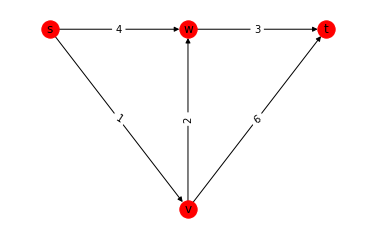

In [93]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
min_dist = djikstra_naive({v : [(t, weights[(v, t)]) for t in k] for v, k in g.adjacency()}, start_vert)
print('Printing minimum distances from starting vertex', start_vert, '\n')
for v in min_dist:
    if v == start_vert:
        continue
    
    print('Vertex', v, 'is at distance', min_dist[v])
    


The naive implementation does work for the simple graph, let us see how it works on the test graph and challenge data set.